In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(z):
    p = 1/(1+np.exp(-z))
    return p

In [3]:
def cost_func(X, y, theta):
    hyp = sigmoid(np.dot(X, theta))
    return (-(y.T * np.log(hyp) + (1 - y).T * np.log(1 - hyp))).mean()

def gradient_descent(X, y, epochs, alpha=0.01):
    theta = np.zeros(X.shape[1])
    cost_history = []
    accuracy = []
    error = []
    for i in range(epochs):
        gradient = alpha * (np.dot(X.T, (sigmoid(np.dot(X, theta))-y)) / X.shape[0])
        theta -= gradient
        cost = cost_func(X, y, theta)
        cost_history.append(cost)
        y_label = predict(X_train,theta)
        accuracy.append(metrics.accuracy_score(y, y_label)*100)
        error.append(100-metrics.accuracy_score(y, y_label)*100)

    return theta, cost_history, accuracy, error

In [4]:
def cost_func_L1(X, y, theta, lmb):
    hyp = sigmoid(np.dot(X, theta))
    return (-(y.T * np.log(hyp) + (1 - y).T * np.log(1 - hyp))).mean() + (lmb*(np.sum(np.abs(theta))) * (1/X.shape[0]))

def gradient_descent_L1(X, y, epochs, alpha=0.01, lmb=0.5):
    theta = np.zeros(X.shape[1])
    cost_history = []
    accuracy = []
    error = []
    for i in range(epochs):
        gradient = alpha * ((np.dot(X.T, (sigmoid(np.dot(X, theta))-y)) + lmb * np.sign(theta)) / X.shape[0])
        theta -= gradient
        cost = cost_func_L1(X, y, theta, lmb)
        cost_history.append(cost)
        y_label = predict(X_train,theta)
        accuracy.append(metrics.accuracy_score(y, y_label)*100)
        error.append(100-metrics.accuracy_score(y, y_label)*100)

    return theta, cost_history, accuracy, error

In [5]:
def cost_func_L2(X, y, theta, lmb):
    hyp = sigmoid(np.dot(X, theta))
    return (-(y.T * np.log(hyp) + (1 - y).T * np.log(1 - hyp))).mean() + (lmb*(np.sum(np.square(theta))) * (1/X.shape[0]))

def gradient_descent_L2(X, y, epochs, alpha=0.01, lmb=0.5):
    theta = np.zeros(X.shape[1])
    cost_history = []
    accuracy = []
    error = []
    for i in range(epochs):
        gradient = alpha * ((np.dot(X.T, (sigmoid(np.dot(X, theta))-y)) + lmb*2*(theta))/ X.shape[0])
        theta -= gradient
        cost = cost_func_L2(X, y, theta, lmb)
        cost_history.append(cost)
        y_label = predict(X_train,theta)
        accuracy.append(metrics.accuracy_score(y, y_label)*100)
        error.append(100-metrics.accuracy_score(y, y_label)*100)

    return theta, cost_history, accuracy, error

In [6]:
def predict(X_test, theta):
    y_pred = sigmoid(X_test.dot(theta))
    y_label = (y_pred>0.5).astype(int)
    return y_label

In [7]:
def plott(iters, acc, error):
    plt.plot(np.arange(iters), acc)
    plt.plot(np.arange(iters), error)
    plt.legend(['Accuracy', 'Error'])
    plt.xlabel('Iterations')
    plt.ylabel('Percentage')
    plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
# Question 1

In [8]:
train = pd.read_csv('train_new.csv', header = None)
test = pd.read_csv('test_new.csv', header = None)
df = pd.concat([train, test], axis=0)

In [9]:
df.drop([2, 3], axis=1, inplace=True)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = pd.get_dummies(X)

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [11]:
Iterations = 100
lmb = 0.5
alpha = 2

## a) Without Regularisation

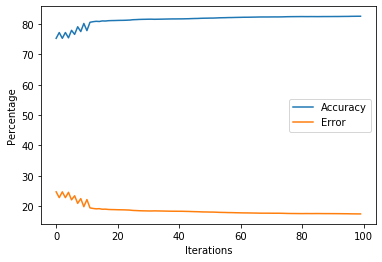


Training accuracy is : 82.5644689392393%

Testing accuracy is : 82.35405610310842%


In [12]:
theta, cost_history, acc, error = gradient_descent(X_train, y_train, Iterations,alpha)
plott(Iterations,acc,error)
print("\nTraining accuracy is : {}%".format(acc[-1]))
print("\nTesting accuracy is : {}%".format(metrics.accuracy_score(y_test, predict(X_test,theta))*100))

## b) L1 Regularisation

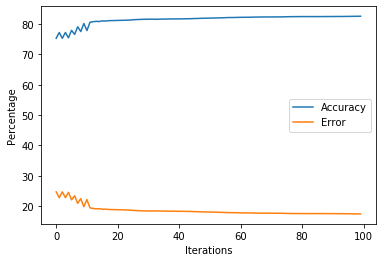


Training accuracy is : 82.56106688439817%

Testing accuracy is : 82.36037402072277%


In [13]:
theta, cost_history, acc, error = gradient_descent_L1(X_train, y_train, Iterations,alpha,lmb)

plott(Iterations,acc,error)

print("\nTraining accuracy is : {}%".format(acc[-1]))
print("\nTesting accuracy is : {}%".format(metrics.accuracy_score(y_test, predict(X_test,theta))*100))

## b) L2 Regularisation

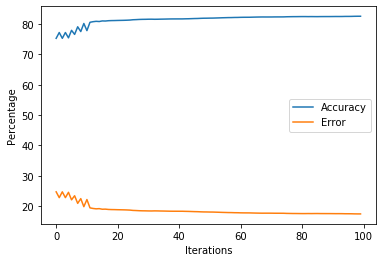


Training accuracy is : 82.56787099408042%

Testing accuracy is : 82.35405610310842%


In [14]:
theta, cost_history, acc, error = gradient_descent_L2(X_train, y_train, Iterations,alpha,lmb)
plott(Iterations,acc,error)
print("\nTraining accuracy is : {}%".format(acc[-1]))
print("\nTesting accuracy is : {}%".format(metrics.accuracy_score(y_test, predict(X_test,theta))*100))

The difference in accuracy in L1 regularization and L2 regularization is not noticable so we can say that these both provide same fit and no one is better than other.

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
# Question 2

In [15]:
import sklearn.datasets
import sklearn.preprocessing
import sklearn.multiclass
import sklearn.linear_model
import sklearn.metrics

In [16]:
X, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True)

In [17]:
X /= 255
y = y.astype(int)
y = sklearn.preprocessing.label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## a) L1 Regularization

In [18]:
clf1 = sklearn.multiclass.OneVsRestClassifier(sklearn.linear_model.LogisticRegression(penalty='l1', solver='liblinear')).fit(X_train, y_train)
y_decision1 = clf1.decision_function(X_test)

In [19]:
print("Testing accuracy (L1 Regularization): ", clf1.score(X_test, y_test))
print("Training accuracy (L1 Regularization): ", clf1.score(X_train, y_train))

Testing accuracy (L1 Regularization):  0.8295670995670996
Training accuracy (L1 Regularization):  0.8478251599147122


## b) L2 Regularization

In [20]:
clf2 = sklearn.multiclass.OneVsRestClassifier(sklearn.linear_model.LogisticRegression(penalty='l2', solver='liblinear')).fit(X_train, y_train)
y_decision2 = clf2.decision_function(X_test)

In [21]:
print("Testing accuracy (L2 Regularization): ", clf2.score(X_test, y_test))
print("Training accuracy (L2 Regularization): ", clf2.score(X_train, y_train))

Testing accuracy (L2 Regularization):  0.8289177489177489
Training accuracy (L2 Regularization):  0.8483795309168444


### Observation-
The difference between tesing and training accuracy is not significant so we can say that the model is a good fit.

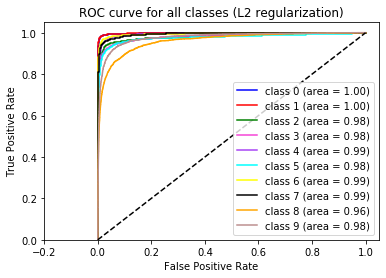

In [22]:
n_classes = 10
fpr2, tpr2, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
  fpr2[i], tpr2[i], _ = sklearn.metrics.roc_curve(y_test[:, i], y_decision2[:, i])
  roc_auc[i] = sklearn.metrics.auc(fpr2[i], tpr2[i])
colors = list(['blue', 'red', 'green', '#f542d7', '#a742f5', 'cyan', 'yellow', 'black', '#FFA500', '#BC8F8F'])
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr2[i], tpr2[i], color=color, label='class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.2, 1.05])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all classes (L2 regularization)')
plt.legend()
plt.show()